In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [81]:
cmap_list = ["#440154ff", "#440558ff", "#450a5cff", "#450e60ff", "#451465ff", "#461969ff",
 "#461d6dff", "#462372ff", "#472775ff", "#472c7aff", "#46307cff", "#45337dff",
 "#433880ff", "#423c81ff", "#404184ff", "#3f4686ff", "#3d4a88ff", "#3c4f8aff", 
 "#3b518bff", "#39558bff", "#37598cff", "#365c8cff", "#34608cff", "#33638dff",
 "#31678dff", "#2f6b8dff", "#2d6e8eff", "#2c718eff", "#2b748eff", "#29788eff",
 "#287c8eff", "#277f8eff", "#25848dff", "#24878dff", "#238b8dff", "#218f8dff",
 "#21918dff", "#22958bff", "#23988aff", "#239b89ff", "#249f87ff", "#25a186ff",
 "#25a584ff", "#26a883ff", "#27ab82ff", "#29ae80ff", "#2eb17dff", "#35b479ff",
 "#3cb875ff", "#42bb72ff", "#49be6eff", "#4ec16bff", "#55c467ff", "#5cc863ff",
 "#61c960ff", "#6bcc5aff", "#72ce55ff", "#7cd04fff", "#85d349ff", "#8dd544ff",
 "#97d73eff", "#9ed93aff", "#a8db34ff", "#b0dd31ff", "#b8de30ff", "#c3df2eff",
 "#cbe02dff", "#d6e22bff", "#e1e329ff", "#eae428ff", "#f5e626ff", "#fde725ff"]

### Params for plotting

In [3]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fontlabelsize = 24
ticklabelsize = 20

In [9]:
phimax = 10
delta_phi = 0.025
fluxvalues = np.arange(-phimax, phimax + delta_phi, delta_phi)
qpcfile = 'qpc-current.dat'
qpcdata = pd.read_csv(qpcfile, header=None)[0].values

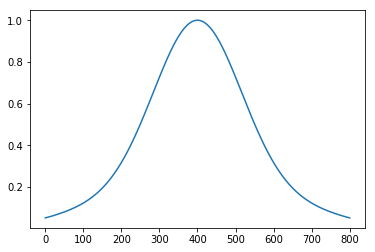

In [5]:
plt.plot(qpcdata)

In [6]:
#fig, ax = plt.subplots()
#co = 150
#ax.plot(fluxvalues[co:-co], qpcdata[co:-co])

In [10]:
from scipy.optimize import curve_fit

def parabolic(x, a1, b1, c1):
    return - a1 * x**2 + b1 *x + c1

def gaussian(x, a, mu, b):
    return a * np.exp( - (x -mu)**2 /(2*b))

### fit for gaussian qpc curve: a = 0.98, mu=0, sigma = 11

In [11]:
coeff, var_matrix = curve_fit(gaussian, fluxvalues, qpcdata)
a, mu, b = coeff
fit = [gaussian(x, a, mu, b) for x in fluxvalues]

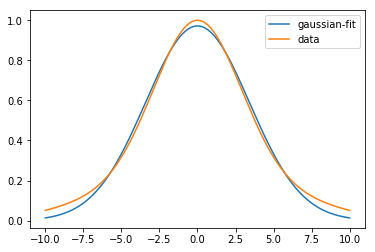

In [17]:
fig, ax = plt.subplots()
ax.plot(fluxvalues, fit, label='gaussian-fit')
ax.plot(fluxvalues, qpcdata, label='data')
ax.legend()

In [18]:
af, muf, bf = var_matrix[0]
(af/a )*100, (muf/mu)*100, (bf /b)*100

(0.00047950968644332122, 31.008001458012068, -0.00064160448541642878)

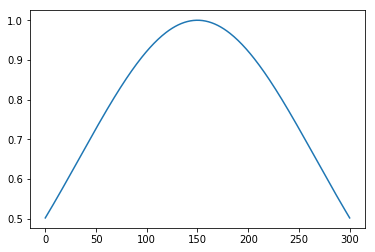

In [24]:
plt.plot(qpcdata[250:-250])

In [34]:
co = 250
oeff2, var_matrix2 = curve_fit(parabolic, fluxvalues[co:-co], qpcdata[co:-co], p0=(0.05, 0, 1))
a1, b1, c1 = coeff
parabolic_fit = [parabolic(f, a1, b1, c1) for f in fluxvalues]

In [35]:
a, mu, b

(0.97155889868346001, 1.5832430029472881e-07, 11.667861438175279)

In [42]:
from math import log, atan, sqrt, pi
def f0(x):
    part1 = sqrt(x**2 + 1) * log(sqrt(x**2 + 1) + x) / x**3
    part2 = -2 / (x * (x + (x**2 + 1)*atan(x)))
    return part1 + part2

def parabolic(phi, x=3):
    return 1 - (pi**2 *f0(x) / 32) * phi**2

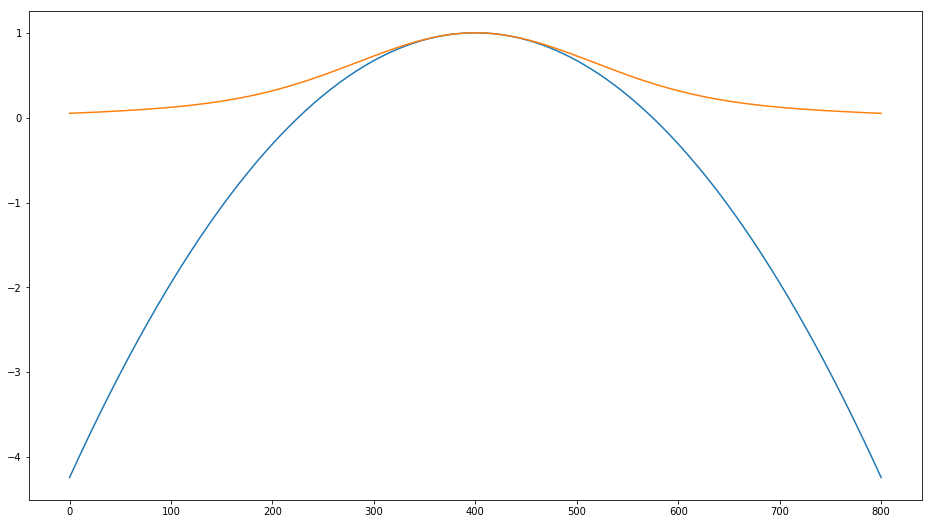

In [43]:
fig, ax = plt.subplots(figsize=(16,9))
res_parabolic = [parabolic(phi) for phi in fluxvalues]
ax.plot(res_parabolic)
ax.plot(qpcdata)
#ax.plot(parabolic(fluxvalues, 0.05, 0, 1)[co:-co], label='fit')
#ax.plot(fluxvalues, parabolic_fit)
#ax.plot(qpcdata[co:-co], label='calc')
#ax.legend()

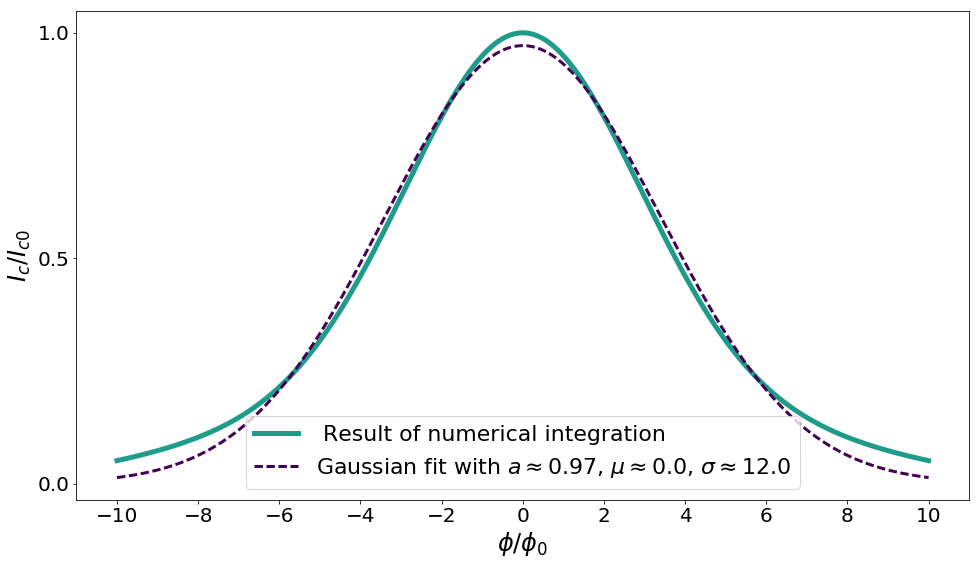

In [110]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(fluxvalues, qpcdata, color=cmap(140), linewidth=5, label=' Result of numerical integration')
ax.plot(fluxvalues, fit, color=cmap(0), linewidth=3, 
        label=r'Gaussian fit with $a \approx {0}$, $\mu \approx {1}$, $\sigma \approx {2}$'.format(
            round(a, 2), round(mu, 2), round(b)), linestyle='--')

ax.legend(prop={'size': 22})
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c / I_{c0}$', fontsize=fontlabelsize)

ax.xaxis.set_ticks(np.arange(-round(phimax), round(phimax)+1, 2))
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([1, 0.5, 0])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

fig.savefig('qpc-numerical-integration-fit.eps')

In [47]:
from math import exp, pi, atan

In [48]:
def exp_limit(x, phi):
    f1 = exp(- pi * phi / (2 * x))
    f2 = (phi * pi / (2 * x))**(3/2)
    f3 = (1 + x**2)**(3/2) / (x + (1 + x**2) * atan(x))
    f4 = pi**(3/2) / (8 * x**2)
    return f1 * f2 * f3 *f4

In [52]:
highfields = [exp_limit(3, phi) for phi in fluxvalues]
res_parabolic = [parabolic(phi) for phi in fluxvalues]
#fit_halt = [gaussian(phi, a, mu, b) for phi in np.arange(0, 20.01, 0.1)]

/home/nefta/.virtualenvs/kwant/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
len(fluxvalues[:200])

200

In [56]:
len(highfields)

801

In [71]:
10/4

2.5

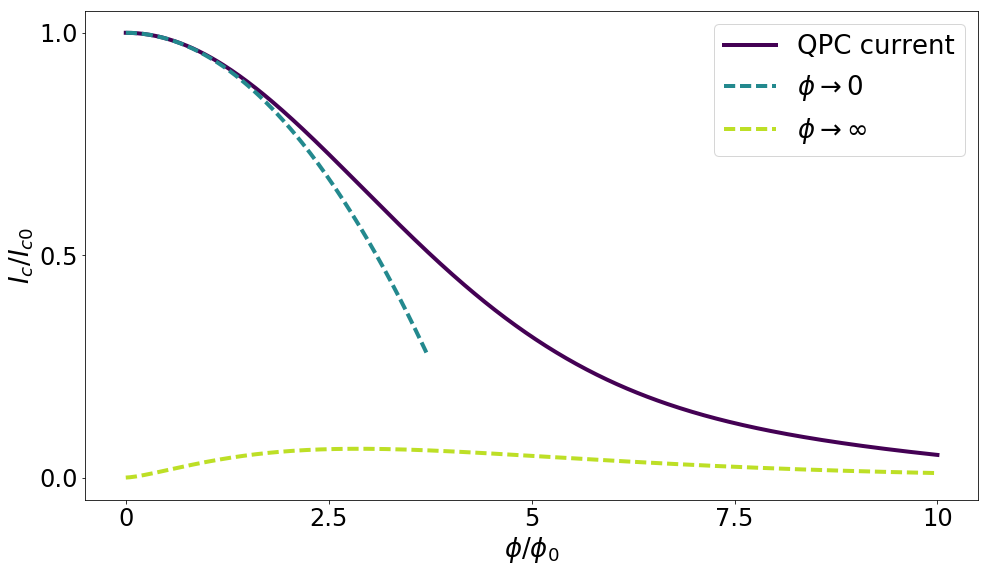

In [109]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(qpcdata[400:], linewidth=4, label='QPC current', color=cmap(0))
ax.plot(res_parabolic[400:550], linewidth=4, linestyle='--', label=r'$\phi \rightarrow 0$', color=cmap(120))
ax.plot(highfields[400:], linewidth=4,  linestyle='--', label=r'$\phi \rightarrow \infty$', color=cmap(230))
ax.xaxis.set_ticks([0, 100, 200, 300, 400])
ax.xaxis.set_ticklabels([0, 2.5, 5, 7.5, 10])
ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_ticks([0, 0.5, 1])
ax.yaxis.set_tick_params(labelsize=24)
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=26)
ax.set_ylabel(r'$I_c / I_{c0}$', fontsize=26)
ax.legend(prop={'size': 26})
fig.savefig('limits-phi.eps')

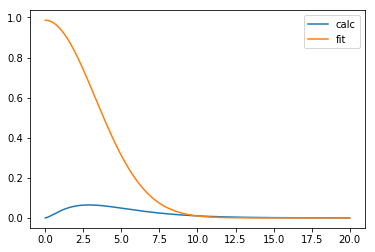

In [40]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, 20.01, 0.1), highfields, label = 'calc')
ax.plot(np.arange(0, 20.01, 0.1), fit_halt, label='fit')
ax.legend()

In [104]:
izero_plane = 3.747137316695259
izero_edge = 0.469805631643439
plane_current = np.abs(izero_plane * pd.read_csv(
                '/home/nefta/thesis/results/plane-current.dat', header=None)[0].values)
plane_edge_current = np.abs(izero_edge * pd.read_csv(
                '/home/nefta/thesis/results/plane-edge-current.dat', header=None)[0].values)

In [105]:
total_current = plane_current + 2 * plane_edge_current

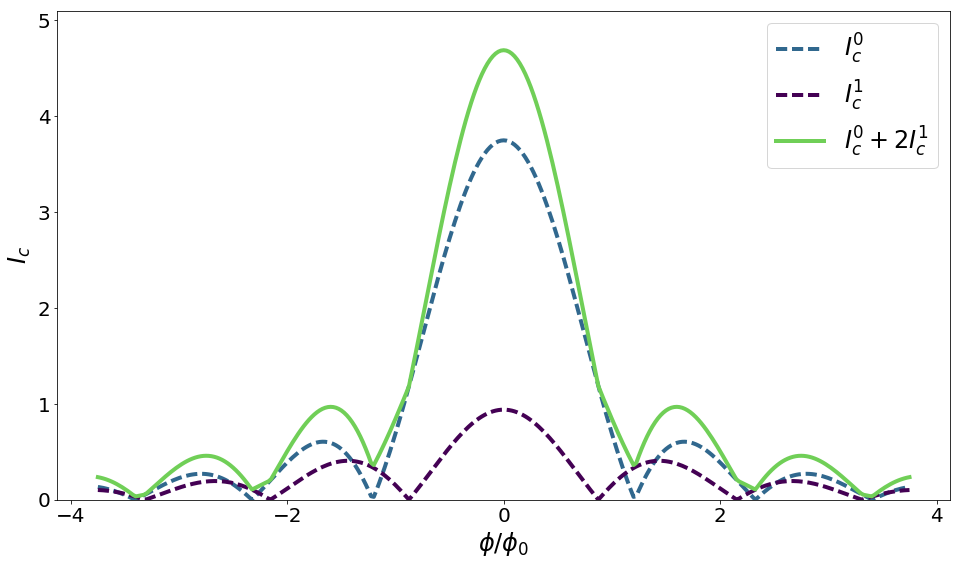

In [109]:
fig, ax = plt.subplots(figsize=(16, 9))
co = 100
fluxvalues[co:-co]
ax.plot(fluxvalues[co:-co], plane_current[co:-co], color=cmap(85), 
        linestyle='--', linewidth=4, label=r'$I_c^{0}$')
ax.plot(fluxvalues[co:-co], 2*plane_edge_current[co:-co], color=cmap(0), 
        linestyle='--', linewidth=4,  label=r'$I_c^{1}$')
ax.plot(fluxvalues[co:-co], total_current[co:-co], color=cmap(200), 
        linewidth=4, label=r'$I_c^{0} + 2 I_c^{1}$')
ax.legend(prop={'size': 24})

ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c$', fontsize=fontlabelsize)
ax.xaxis.set_ticks([-4, -2, 0, 2, 4])
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([0, 1, 2, 3, 4, 5])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_ylim([0, 5.1])

fig.savefig('plane-setup-edge-contribution.eps')

In [1]:
from math import modf

In [32]:
def ic_short(phi, tau):
    frac = phi % 1
    return 2 *tau * (1- frac) * frac / abs(phi)
    #frac = abs(modf(phi)[0])
    #if phi > 0:
    #    return 2 *tau * (1- frac) * frac / abs(phi)
    #else:
    #    return - 2* tau * (frac - 1) * frac / abs(phi)

In [30]:
def ic_long(phi, tau):
    frac = phi % 1
    return tau * (1- frac)**2 * frac**2 / abs(phi/2)**2
    

In [36]:
ic_long(0.0001, 1)x

3.9992000400000003

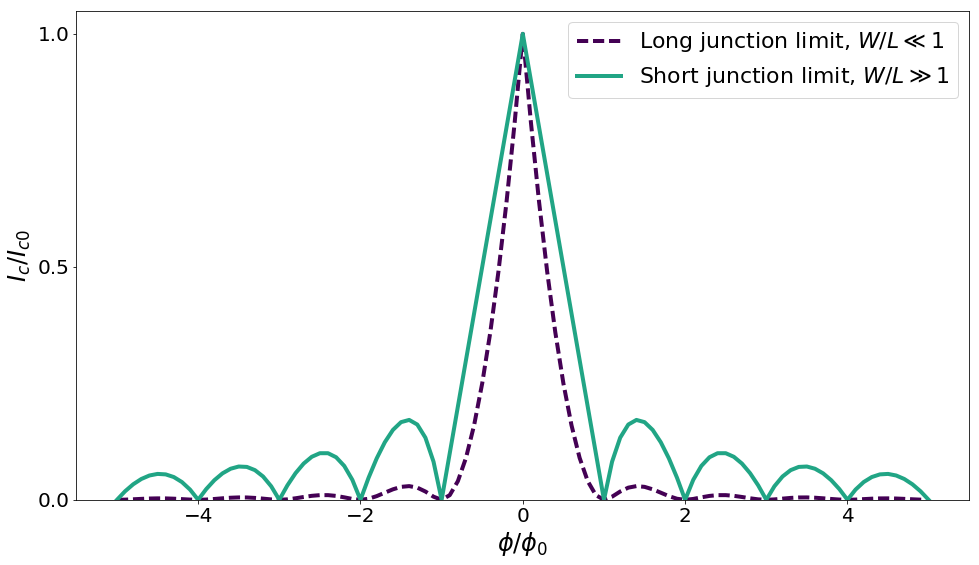

In [102]:
fig, ax1 = plt.subplots(figsize=(16,9))
fluxvalues = np.arange(-5, 5.01, 0.1)
tau = 1
long_zero = ic_long(1e-6, tau)
short_zero = ic_short(1e-6, tau)
res_long = [ic_long(phi, tau) / long_zero for phi in fluxvalues]
res_short = [ic_short(phi, tau) / short_zero for phi in fluxvalues]
ax1.plot(fluxvalues, res_long, label=r'Long junction limit, $W/L \ll 1$ ', linewidth=4, color=cmap(0), linestyle='--')
ax1.plot(fluxvalues, res_short,  label=r'Short junction limit, $W/L \gg 1$', linewidth=4, color=cmap(150) )
ax1.legend(prop={'size': 22})
ax1.xaxis.set_ticks([-4, -2, 0, 2, 4])
ax1.xaxis.set_tick_params(labelsize=ticklabelsize)
ax1.yaxis.set_ticks([1, 0.5, 0])
ax1.yaxis.set_tick_params(labelsize=ticklabelsize)
ax1.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax1.set_ylabel(r'$I_c / I_{c0}$', fontsize=fontlabelsize)
ax1.set_ylim([0, 1.05])
fig.savefig('ic-long-vs-short.eps')

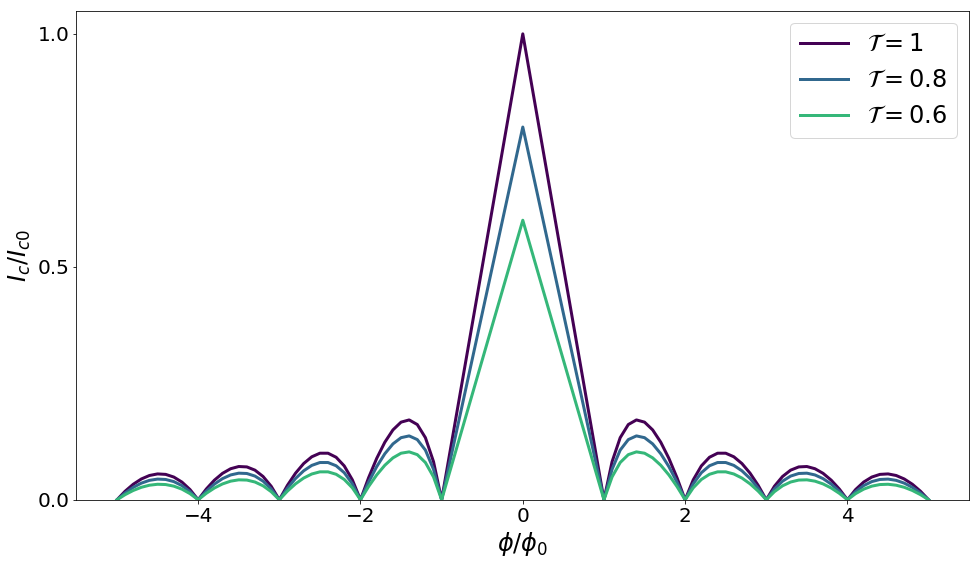

In [110]:
fig, ax = plt.subplots(figsize=(16, 9))
fluxvalues = np.arange(-5, 5.01, 0.1)
tvals = [1, 0.8, 0.6]

fontlabelsize = 24
ticklabelsize = 20

ax.xaxis.set_ticks([-4, -2, 0, 2, 4])
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([1, 0.5, 0])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

for index, tau in enumerate(tvals):
    res = [ic_short(phi, tau) / short_zero for phi in fluxvalues]
    ax.plot(fluxvalues, res, color=cmap(index * round(cmap.N / len(tvals))), linewidth=3,
           label=r'$\mathcal{{T}} = {}$'.format(tau))
ax.legend(prop={'size': 24})
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c / I_{c0}$', fontsize=fontlabelsize)
ax.set_ylim([0, 1.05])
fig.savefig('ic_vs_tau.eps')